In [534]:
#Importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge , Lasso 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# hide warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300

In [535]:
house=pd.read_csv('train .csv')

In [536]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Null Value Check

In [537]:
round((house.isnull().sum()/house.shape[0]*100),2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
MasVnrType       59.73
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

In [538]:
null_values=round((house.isnull().sum()/house.shape[0]*100),2)

## Removing the columns with NULL values more than 50%

In [539]:
columns_with_high_null_values=null_values[null_values>50].index.tolist()
columns_with_high_null_values

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

In [540]:
house=house.drop(columns=columns_with_high_null_values,axis=1)

In [541]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [542]:
def nullvaluecheck():
    return round((house.isnull().sum()/house.shape[0]*100),2).sort_values(ascending=False)

In [543]:
list1=nullvaluecheck()[nullvaluecheck()>0].index.tolist()

### Impute the Nan Values with 'None' for categorical variables. 
### Impute the Nan Values with median values for Numerical Variables.

In [544]:
for i in list1:
    if house[i].dtype=='O':
        house[i]=house[i].fillna('None')
    else:
        house[i]=house[i].fillna(house[i].median())

### Creating a Derived columns 'IsRemodelled', If 'YearBuilt' is not equal to 'YearRemodAdd' then it is remodelled.

In [545]:
def isremod(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    else:
        return 1

In [546]:
house['IsRemodelled'] = house.apply(isremod, axis=1)

### Creating a Derived column 'houseage'. houseage=YrSold-YearBuilt

In [547]:
def houseage(row):
    return row['YrSold'] - row['YearBuilt']

In [548]:
house['houseage'] = house.apply(houseage, axis=1)

In [549]:
categorical_columns = house.select_dtypes(include=['object'])
categorical_columns.shape

(1460, 38)

### Removing categorical features that have more than 85% data associated to one value as these columns values will be skewed to one value

In [550]:
for i in categorical_columns:
    if round(house[i].value_counts().max()/len(house)*100,2) > 85 : 
        house=house.drop(columns=[i],axis=1)

In [551]:
categorical_columns1 = house.select_dtypes(include=['object'])
categorical_columns1.shape

(1460, 20)

In [552]:
numerical_columns = house.select_dtypes(include=['int64','float64'])
numerical_columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,IsRemodelled,houseage
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,5
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,31
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,1,7
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,1,91
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,1,8
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,1,32
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,1,69
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125,1,60


### Removing Numerical features that have more than 85% data associated to one value as these columns values will be skewed to one value

In [553]:
for i in numerical_columns:
    if round(house[i].value_counts().max()/len(house)*100,2) > 85 : 
        house=house.drop(columns=[i],axis=1)

In [554]:
numerical_columns1 = house.select_dtypes(include=['int64','float64'])
numerical_columns1.shape

(1460, 31)

In [555]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SaleCondition', 'SalePrice',
       'IsRemodelled', 'houseage'],
      dtype='object')

### Dropping 'YearBuilt','YearRemodAdd','YearRemodAdd','MoSold','YrSold' as we have derived columns out of it. 

In [556]:
drop_cols=['Id','YearBuilt', 'YearRemodAdd','MoSold', 'YrSold','GarageYrBlt']

In [557]:
house=house.drop(columns=drop_cols,axis=1)

In [558]:
house.shape

(1460, 45)

### Plotting of outliers 

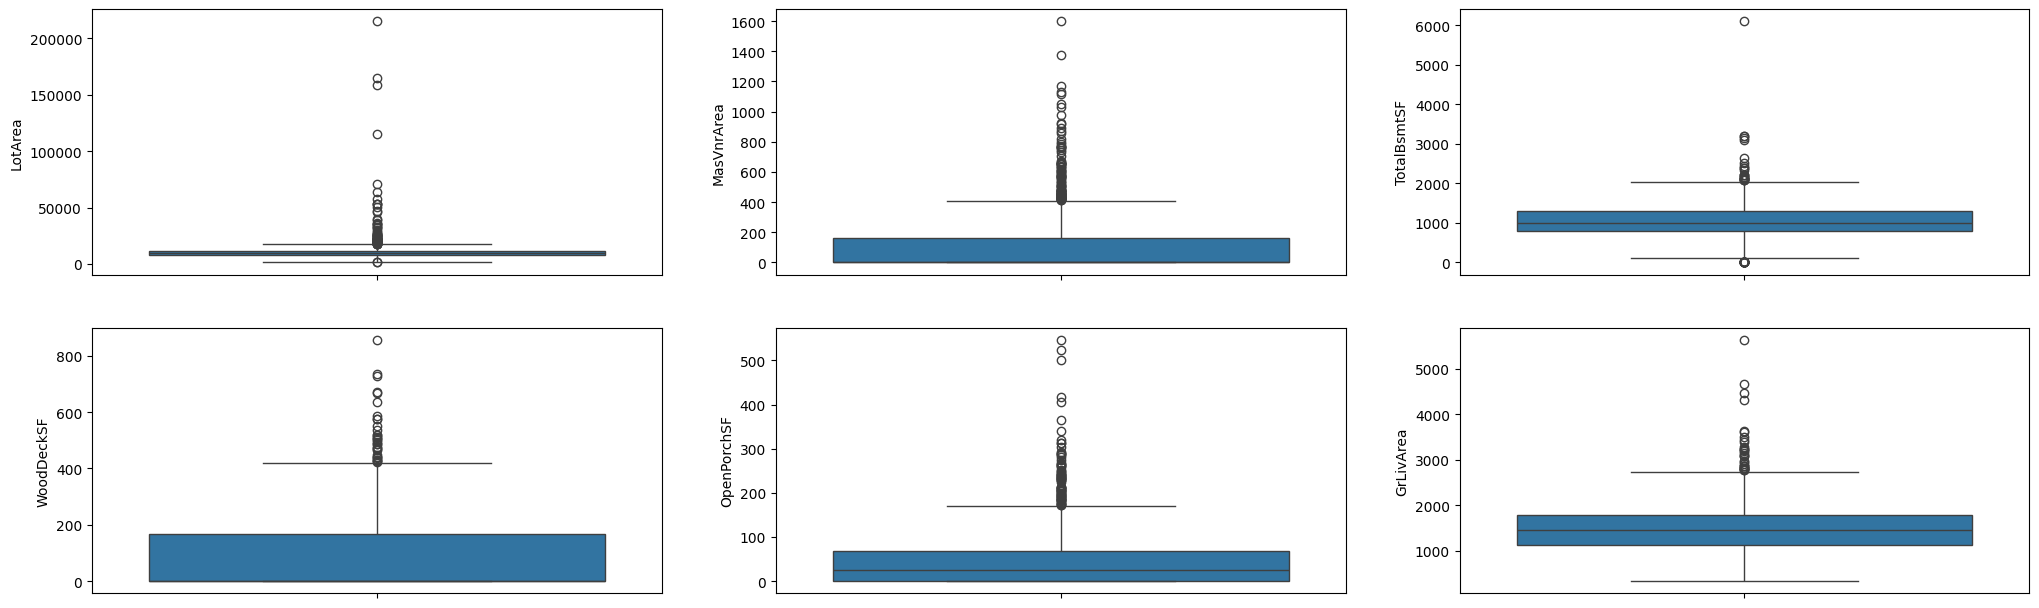

In [559]:
plt.figure(figsize=(25, 20))

plt.subplot(5,3,1)
sns.boxplot(house['LotArea'])

plt.subplot(5,3,2)
sns.boxplot(house['MasVnrArea'])

plt.subplot(5,3,3)
sns.boxplot(house['TotalBsmtSF'])

plt.subplot(5,3,4)
sns.boxplot(house['WoodDeckSF'])

plt.subplot(5,3,5)
sns.boxplot(house['OpenPorchSF'])

plt.subplot(5,3,6)
sns.boxplot(house['GrLivArea'])

plt.show();

In [560]:
#Removing Outliers from the above columns

In [561]:
house=house[house["LotArea"] < house['LotArea'].quantile(0.99)]
house=house[house["MasVnrArea"] < house['MasVnrArea'].quantile(0.99)]
house=house[house["TotalBsmtSF"] < house['TotalBsmtSF'].quantile(0.99)]
house=house[house["WoodDeckSF"] < house['WoodDeckSF'].quantile(0.99)]
house=house[house["OpenPorchSF"] < house['OpenPorchSF'].quantile(0.99)]

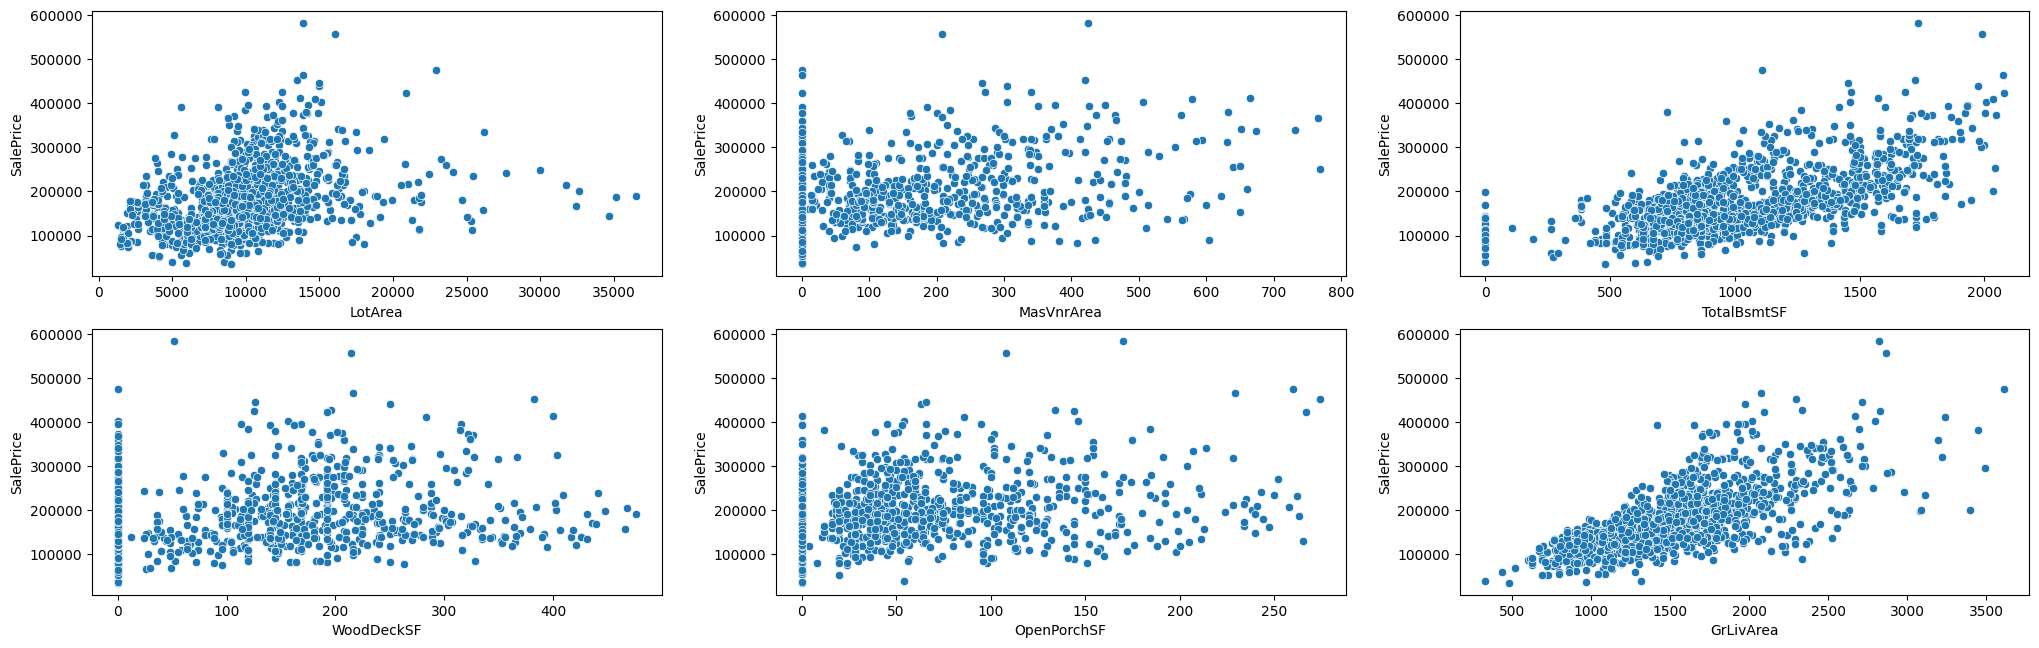

In [562]:
plt.figure(figsize=(25, 20))

plt.subplot(5,3,1)
sns.scatterplot(x='LotArea',y='SalePrice',data=house)

plt.subplot(5,3,2)
sns.scatterplot(x='MasVnrArea',y='SalePrice',data=house)

plt.subplot(5,3,3)
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=house)

plt.subplot(5,3,4)
sns.scatterplot(x='WoodDeckSF',y='SalePrice',data=house)
plt.subplot(5,3,5)
sns.scatterplot(x='OpenPorchSF',y='SalePrice',data=house)

plt.subplot(5,3,6)
sns.scatterplot(x='GrLivArea',y='SalePrice',data=house)

plt.show();

## Data Visualization

### 'SalePrice' is our target variable and it should be normally distributed

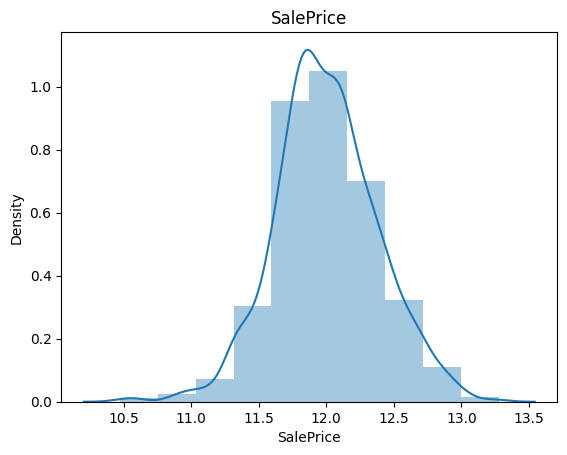

In [563]:
house['SalePrice'] = np.log(house['SalePrice'])

plt.title('SalePrice')
sns.distplot(house['SalePrice'], bins=10)
plt.show();

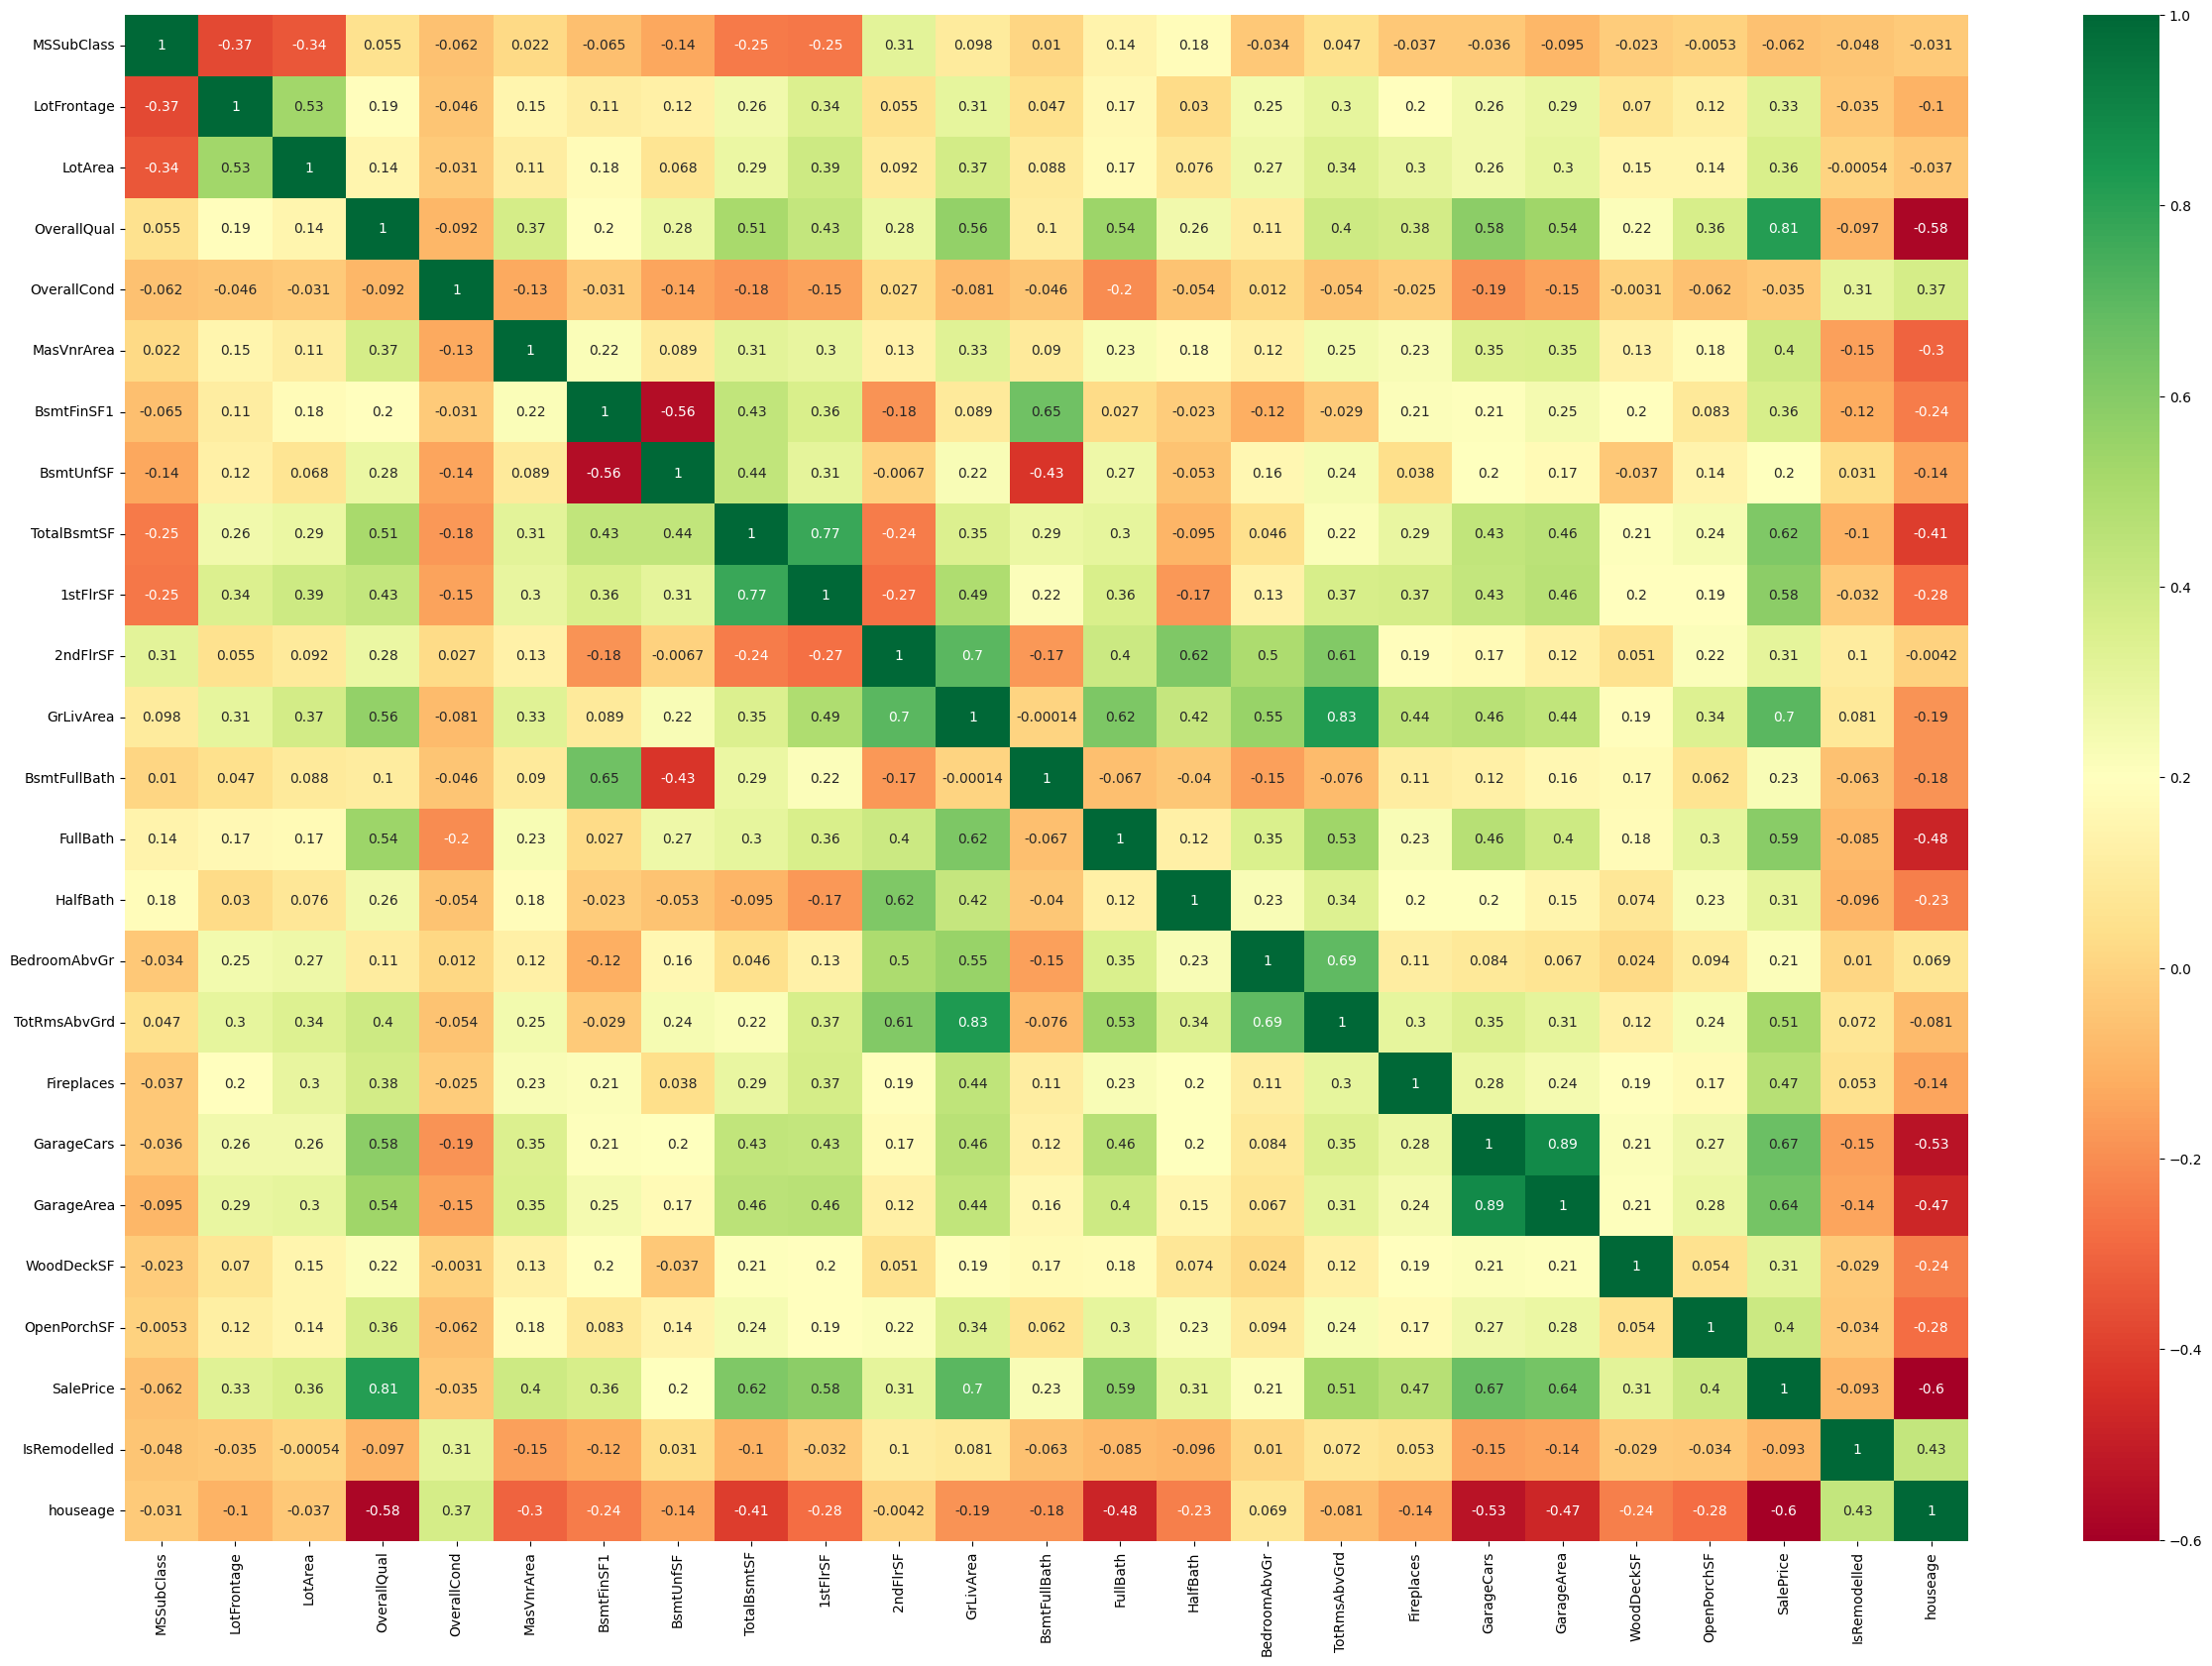

In [564]:
#checking correlations of independent variables with the target variables.
plt.figure(figsize = (30, 20))
sns.heatmap(house.select_dtypes(include=['int64','float64']).corr(), annot = True,cmap='RdYlGn')
plt.show()

###  Observation: 
From the heatmap we can understand that `GrLivArea`,`OverallQual`,`TotalBsmtSF`,`GarageCars` and `GarageArea` are highly correlated with `SalePrice` 

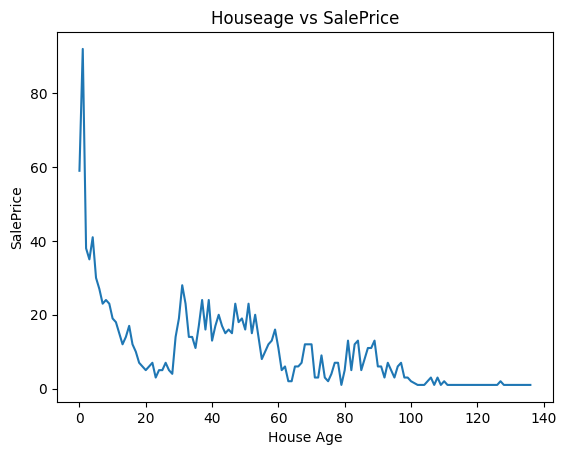

In [565]:
plt.title('Houseage vs SalePrice')
house.groupby('houseage')['SalePrice'].count().plot()
plt.xlabel('House Age')
plt.ylabel('SalePrice')
plt.show()

Independent Variable `houseage` is negatively correlated with `SalePrice` which means as the houseage increases SalePrice decrease.  

In [566]:
cat_columns=house.select_dtypes(include=['object'])

### Data Preparation
Creating Dummies for Categorical Variables 

In [567]:
house_dummies = pd.get_dummies(cat_columns, drop_first=True)

In [568]:
house=pd.concat([house,house_dummies],axis=1)

In [569]:
## Dropping the Categorical Variables from the house dataset
house=house.drop(columns=cat_columns,axis=1)

In [570]:
house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,houseage,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,12.247694,0,5,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,6,1,2,460,298,0,12.109011,0,31,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,F

In [571]:
# Splitting up Independent variables and Target Variables
X = house.drop(['SalePrice'], axis=1)
y=house['SalePrice']

In [572]:
X.shape

(1386, 152)

### Train and Test Split

In [573]:
# scaling the features - necessary before using Ridge or Lasso
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'GarageType_Detchd', 'GarageType_None', 'GarageFinish_None',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=152)

In [574]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

### Recursive Feature Elimination 
Best 50 Variables are needed for Linear model 

In [575]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=50)            
rfe = rfe.fit(X_train, y_train)

In [576]:
col = X_train.columns[rfe.support_]

In [577]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 91),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 57),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 5),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 84),
 ('TotRmsAbvGrd', False, 29),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 79),
 ('IsRemodelled', False, 24),
 ('houseage', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 34),
 ('LotShape_IR3', False, 75),
 ('LotShape_Reg', False, 21),
 ('LotConfig_CulDSac', True, 1),
 ('LotConfig_FR2', False, 46),
 ('LotConfig_FR3', False, 92),
 ('LotConfig_Inside', False, 20),
 ('Neighborhood_Blueste', False, 102),

In [578]:
cols = X_train.columns[rfe.support_]
cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'Fireplaces', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'houseage', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_CulDSac', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'HouseStyle_1Story', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'BsmtExposure_Gd',
       'BsmtFinType1_Unf', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'FireplaceQu_None', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageType_None', 'GarageFinish_None',
       'GarageFinish_Unf', 'SaleCondition_Normal', 'SaleCondi

In [579]:
X_train_rfe=X_train[cols]

In [580]:
X_train_rfe

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageCars,GarageArea,WoodDeckSF,houseage,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_NridgHt,Neighborhood_StoneBr,HouseStyle_1Story,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Foundation_PConc,BsmtExposure_Gd,BsmtFinType1_Unf,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_None,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Partial
902,0.069599,-0.010047,0.343228,-0.781142,-1.414242,0.334412,-0.631398,0.092688,1.032015,-0.808821,0.836502,1.249098,0.657260,0.347145,0.308833,1.984959,0.071531,-0.214564,-0.108069,0.521114,-0.422577,-0.250766,-0.203279,-0.195454,-0.221822,-0.127,-0.995680,-0.183186,-0.02687,-0.39736,-0.421391,-0.733683,-0.391252,-0.881432,-0.292158,-0.653754,-0.170156,-0.822154,0.979998,-0.977172,0.833293,-0.117894,-0.247499,-0.080845,-0.609032,-0.245853,-0.245853,-0.855862,0.464531,-0.29937
1122,0.069599,-0.010047,0.366240,0.722556,-0.520018,1.909633,0.498468,0.467795,2.184368,-0.808821,0.836502,1.249098,-0.929783,0.347145,1.085678,-0.782098,-0.690079,-0.214564,-0.108069,0.521114,-0.422577,-0.250766,-0.203279,-0.195454,-0.221822,-0.127,-0.995680,-0.183186,-0.02687,-0.39736,2.373095,-0.733683,-0.391252,-0.881432,-0.292158,-0.653754,-0.170156,-0.822154,0.979998,1.023361,0.833293,-0.117894,-0.247499,-0.080845,-0.609032,-0.245853,-0.245853,-0.855862,0.464531,-0.29937
538,-0.874975,0.038138,0.124256,0.722556,-0.520018,-1.014400,1.285713,1.151645,0.118152,-0.808821,0.836502,-0.745429,-0.929783,0.347145,0.318364,-0.782098,-1.021214,-0.214564,-0.108069,0.521114,-0.422577,-0.250766,-0.203279,-0.195454,4.508112,-0.127,1.004338,-0.183186,-0.02687,-0.39736,-0.421391,1.362986,-0.391252,1.134517,-0.292158,-0.653754,-0.170156,1.216317,-1.020410,1.023361,0.833293,-0.117894,-0.247499,-0.080845,-0.609032,-0.245853,-0.245853,-0.855862,0.464531,-0.29937
986,0.069599,-0.010047,-0.127902,-0.029293,2.162654,-0.055780,-0.589551,-0.969154,0.322874,-0.808821,-1.012608,1.249098,-0.929783,0.347145,0.089600,-0.782098,0.170871,-0.214564,-0.108069,0.521114,-0.422577,-0.250766,-0.203279,-0.195454,-0.221822,-0.127,-0.995680,-0.183186,-0.02687,-0.39736,-0.421391,-0.733683,-0.391252,-0.881432,-0.292158,-0.653754,-0.170156,1.216317,-1.020410,1.023361,0.833293,-0.117894,-0.247499,-0.080845,-0.609032,-0.245853,-0.245853,1.168412,0.464531,-0.29937
490,0.069599,-0.010047,-0.030769,-0.029293,-0.520018,0.681250,-0.605244,-0.732548,0.669002,1.147594,0.836502,1.249098,-0.929783,0.347145,0.385087,-0.782098,-0.921874,-0.214564,-0.108069,0.521114,-0.422577,3.987786,-0.203279,-0.195454,-0.221822,-0.127,-0.995680,-0.183186,-0.02687,-0.39736,-0.421391,1.362986,-0.391252,1.134517,-0.292158,-0.653754,-0.170156,-0.822154,0.979998,1.023361,0.833293,-0.117894,-0.247499,-0.080845,-0.609032,-0.245853,-0.245853,-0.855862,0.464531,-0.29937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,-0.874975,-1.600151,1.420651,-0.781142,0.374206,0.088736,-0.422164,-0.784486,-1.298019,1.147594,-1.012608,-0.745429,0.657260,-1.000596,-0.606225,-0.782098,0.005304,-0.214564,-0.108069,0.521114,-0.422577,3.987786,-0.203279,-0.195454,-0.221822,-0.127,1.004338,-0.183186,-0.02687,-0.39736,-0.421391,-0.733683,-0.391252,-0.881432,-0.292158,-0.653754,-0.170156,-0.822154,0.979998,-0.977172,0.833293,-0.117894,-0.247499,-0.080845,-0.609032,-0.245853,-0.245853,1.168412,0.464531,-0.29937
53,0.541886,-0.443712,-0.611385,-0.781142,-0.520018,-0.094317,-1.677571,0.646693,-0.251192,-0.808821,-1.012608,-0.745429,0.657260,0.

In [581]:
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Model Building and Evaluation

## Ridge Regression

In [582]:

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100]}

ridge = Ridge()

# cross validation

folds = 5

ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [583]:
print(ridge_model_cv.best_params_['alpha'])

3.0


In [584]:
alpha=ridge_model_cv.best_params_['alpha']

In [585]:
# check the coefficient values with lambda = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.01801374  0.01136031  0.01344765  0.07295794  0.05755404  0.01894097
  0.05247594  0.00870181  0.10362275  0.01315809  0.01115788  0.01016218
  0.00945495  0.01590636  0.02263444  0.01344435 -0.06372216  0.04985337
  0.02661008  0.0760751   0.04343753  0.00942941  0.01414372  0.02871906
  0.01760405  0.01765966 -0.01717303  0.01451336 -0.00344758 -0.00994916
  0.01032037  0.01211026  0.01203933  0.03148369  0.01416495 -0.01108832
 -0.0237541  -0.03130245 -0.03312457 -0.01002376  0.07005011  0.01054441
  0.03427493  0.00547911  0.06219378  0.0116499   0.0116499  -0.01071303
  0.01885755  0.02637158]


In [586]:
X_train_ridge = X_train[X_train.columns]

In [587]:
lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE again to get best 20 Features
rfe = RFE(lm,n_features_to_select= 20)            
rfe = rfe.fit(X_train_ridge, y_train)

In [588]:
feature_columns = X_train_ridge.columns[rfe.support_]
feature_columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       'GrLivArea', 'GarageArea', 'houseage', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Foundation_PConc', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'FireplaceQu_None', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')

In [589]:
print("\n The best estimator across ALL searched params:\n",
          ridge_model_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          ridge_model_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          ridge_model_cv.best_params_)


 The best estimator across ALL searched params:
 Ridge(alpha=3.0)

 The best score across ALL searched params:
 -0.0781198985713721

 The best parameters across ALL searched params:
 {'alpha': 3.0}


In [590]:
ridge1 = Ridge(alpha=alpha)

ridge1.fit(X_train, y_train)
ridge1.coef_

array([-0.01801374,  0.01136031,  0.01344765,  0.07295794,  0.05755404,
        0.01894097,  0.05247594,  0.00870181,  0.10362275,  0.01315809,
        0.01115788,  0.01016218,  0.00945495,  0.01590636,  0.02263444,
        0.01344435, -0.06372216,  0.04985337,  0.02661008,  0.0760751 ,
        0.04343753,  0.00942941,  0.01414372,  0.02871906,  0.01760405,
        0.01765966, -0.01717303,  0.01451336, -0.00344758, -0.00994916,
        0.01032037,  0.01211026,  0.01203933,  0.03148369,  0.01416495,
       -0.01108832, -0.0237541 , -0.03130245, -0.03312457, -0.01002376,
        0.07005011,  0.01054441,  0.03427493,  0.00547911,  0.06219378,
        0.0116499 ,  0.0116499 , -0.01071303,  0.01885755,  0.02637158])

In [591]:
y_train_pred = ridge1.predict(X_train)
print('The training accuracy is:')
print(r2_score(y_true=np.exp(y_train), y_pred=np.exp(y_train_pred)))

The training accuracy is:
0.9372607177005761


In [592]:
# predict for the test dataset
y_test_pred = ridge1.predict(X_test)
print('The testing accuracy is:')
print(r2_score(y_true=np.exp(y_test), y_pred=np.exp(y_test_pred)))

The testing accuracy is:
0.9094191176565719


In [593]:
ridge_df=pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_,ridge1.coef_)), columns=['Features', 'rfe_support', 'rfe_ranking','Coef with alpha='+str(ridge_model_cv.best_params_['alpha'])])

In [594]:
ridge_df

,Features,rfe_support,rfe_ranking,Coef with alpha=3.0
0,MSSubClass,False,3,-0.018014
1,LotFrontage,False,25,0.011360
2,LotArea,True,1,0.013448
3,OverallQual,True,1,0.072958
4,OverallCond,True,1,0.057554
5,BsmtFinSF1,True,1,0.018941
6,TotalBsmtSF,True,1,0.052476
7,1stFlrSF,False,30,0.008702
8,GrLivArea,True,1,0.103623
9,BsmtFullBath,False,12,0.013158


In [595]:
df=ridge_df[ridge_df.rfe_support==True].sort_values(by='Coef with alpha='+str(ridge_model_cv.best_params_['alpha']), ascending=False)

In [596]:
df.head(10)

,Features,rfe_support,rfe_ranking,Coef with alpha=3.0
8,GrLivArea,True,1,0.103623
19,MSZoning_RL,True,1,0.076075
3,OverallQual,True,1,0.072958
4,OverallCond,True,1,0.057554
6,TotalBsmtSF,True,1,0.052476
17,MSZoning_FV,True,1,0.049853
20,MSZoning_RM,True,1,0.043438
33,Foundation_PConc,True,1,0.031484
23,Neighborhood_Crawfor,True,1,0.028719
18,MSZoning_RH,True,1,0.026610


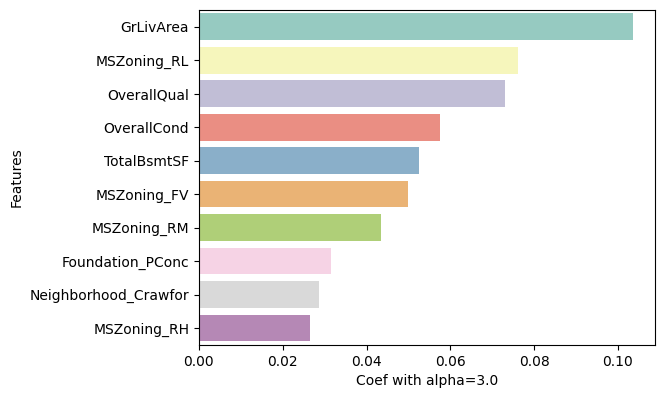

In [597]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coef with alpha='+str(ridge_model_cv.best_params_['alpha']), palette='Set3', data = df.head(10))
plt.show()

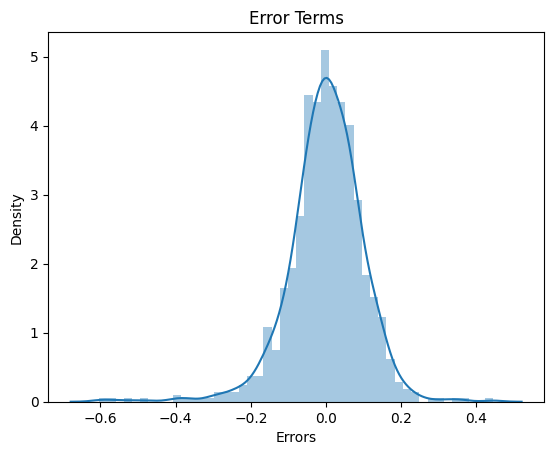

In [598]:
#Normal Distribution check
res =y_train-y_train_pred
sns.distplot(res)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

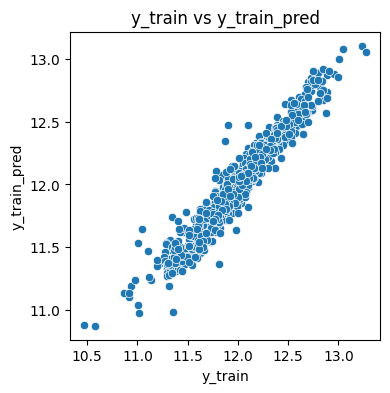

In [599]:
#Linearity check
plt.figure(figsize=(4,4))
sns.scatterplot(x=y_train,y=y_train_pred)
plt.title('y_train vs y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.show()

Text(0, 0.5, 'Predicted Values')

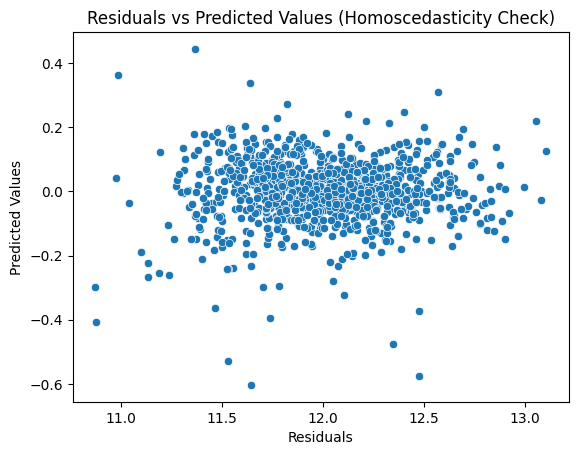

In [600]:
#Homoscedasticity Check
sns.scatterplot(x=y_train_pred,y=res)
plt.title('Residuals vs Predicted Values (Homoscedasticity Check)')
plt.xlabel('Residuals')
plt.ylabel('Predicted Values')

## Lasso Regression

In [601]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [602]:
print(lasso_model_cv.best_params_)

{'alpha': 0.0002}


In [603]:
alpha = lasso_model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-1.76266939e-02,  1.11131434e-02,  1.34505885e-02,  7.36317421e-02,
        5.79173876e-02,  1.91800149e-02,  5.23490503e-02,  6.86260839e-03,
        1.06765206e-01,  1.29470136e-02,  9.82251213e-03,  9.21603240e-03,
        9.51756408e-03,  1.51275129e-02,  2.21854707e-02,  1.32638152e-02,
       -6.49400495e-02,  4.86996782e-02,  2.54259729e-02,  7.41895596e-02,
        4.13952199e-02,  9.20970795e-03,  1.39994042e-02,  2.80561804e-02,
        1.75950895e-02,  1.73421854e-02, -1.55592654e-02,  1.46233665e-02,
       -3.33815535e-03, -8.42606139e-03,  9.87359606e-03,  1.14729559e-02,
        1.04999979e-02,  3.14869537e-02,  1.41541204e-02, -1.09189397e-02,
       -2.31392686e-02, -3.02234994e-02, -3.20270785e-02, -9.87367320e-03,
        5.18566758e-02,  6.14754693e-03,  2.53563396e-02,  2.43511555e-03,
        4.58403946e-02,  1.40979501e-02,  3.98642026e-18, -1.08456165e-02,
        1.85417626e-02,  2.62686771e-02])

In [604]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})

In [605]:
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0176
1,LotFrontage,0.0111
2,LotArea,0.0135
3,OverallQual,0.0736
4,OverallCond,0.0579
5,BsmtFinSF1,0.0192
6,TotalBsmtSF,0.0523
7,1stFlrSF,0.0069
8,GrLivArea,0.1068
9,BsmtFullBath,0.0129


In [606]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [607]:
print("\n The best estimator across ALL searched params:\n",
          lasso_model_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          lasso_model_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          lasso_model_cv.best_params_)


 The best estimator across ALL searched params:
 Lasso(alpha=0.0002)

 The best score across ALL searched params:
 -0.07818904564264723

 The best parameters across ALL searched params:
 {'alpha': 0.0002}


In [608]:

alpha_lasso =lasso_model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [609]:
lasso.coef_

array([-1.76266939e-02,  1.11131434e-02,  1.34505885e-02,  7.36317421e-02,
        5.79173876e-02,  1.91800149e-02,  5.23490503e-02,  6.86260839e-03,
        1.06765206e-01,  1.29470136e-02,  9.82251213e-03,  9.21603240e-03,
        9.51756408e-03,  1.51275129e-02,  2.21854707e-02,  1.32638152e-02,
       -6.49400495e-02,  4.86996782e-02,  2.54259729e-02,  7.41895596e-02,
        4.13952199e-02,  9.20970795e-03,  1.39994042e-02,  2.80561804e-02,
        1.75950895e-02,  1.73421854e-02, -1.55592654e-02,  1.46233665e-02,
       -3.33815535e-03, -8.42606139e-03,  9.87359606e-03,  1.14729559e-02,
        1.04999979e-02,  3.14869537e-02,  1.41541204e-02, -1.09189397e-02,
       -2.31392686e-02, -3.02234994e-02, -3.20270785e-02, -9.87367320e-03,
        5.18566758e-02,  6.14754693e-03,  2.53563396e-02,  2.43511555e-03,
        4.58403946e-02,  1.40979501e-02,  3.98642026e-18, -1.08456165e-02,
        1.85417626e-02,  2.62686771e-02])

In [610]:
lm = Lasso(alpha=lasso_model_cv.best_params_['alpha'])
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print('The training accuracy is:')
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print('The test accuracy is:')
print(r2_score(y_true=y_test, y_pred=y_test_pred))

The training accuracy is:
0.9304863358234924
The test accuracy is:
0.8922548856714947


In [611]:
lassodf=pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_,ridge1.coef_)), columns=['Features', 'rfe_support', 'rfe_ranking','Coefficients'])

In [612]:
lassodf=lassodf[lassodf['rfe_support']==True]

In [613]:
lassodf=lassodf.sort_values(by=['Coefficients'], ascending=False)
lassodf.head(10)

,Features,rfe_support,rfe_ranking,Coefficients
8,GrLivArea,True,1,0.103623
19,MSZoning_RL,True,1,0.076075
3,OverallQual,True,1,0.072958
4,OverallCond,True,1,0.057554
6,TotalBsmtSF,True,1,0.052476
17,MSZoning_FV,True,1,0.049853
20,MSZoning_RM,True,1,0.043438
33,Foundation_PConc,True,1,0.031484
18,MSZoning_RH,True,1,0.026610
14,GarageArea,True,1,0.022634


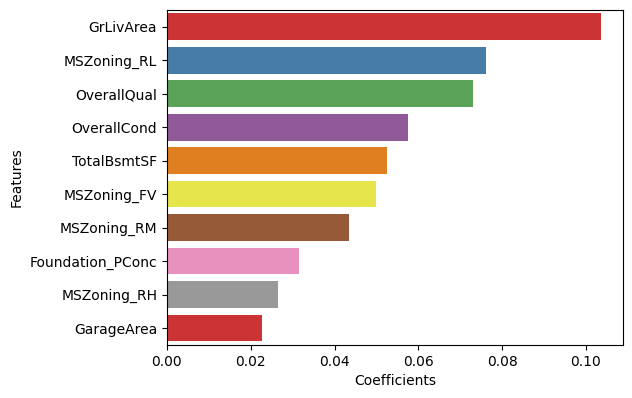

In [614]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficients', palette='Set1', data = lassodf.head(10))
plt.show()

In [615]:
mean_squared_error(y_test, ridge.predict(X_test))

0.01575733461567464

In [616]:
mean_squared_error(y_test, lasso.predict(X_test))

0.015641672357915495

### Conclusion

#### Ridge Regression  :                                                                
                      Alpha = 3.0
                      Mean Squared Error = 0.01575
                      Training Accuracy = 93.72%
                      Test Accuracy = 90.94%
                     
#### Lasso Regression :
                      Alpha = 0.0002
                      Mean Squared Error = 0.01564
                      Training Accuracy = 93.04%
                      Test Accuracy = 89.22%

##### The mean squared error of lasso is little less than Ridge.

#####   Lasso helps in feature reduction (as the coefficient value of one of the feature became 0) so  Lasso has a better edge over Ridge.

##### According to Lasso the factors that generally affect the price are : 
                              - GrLivArea
                              - MSZoning_RL
                              - OverallQual
                              - OverallCond
                              - TotalBsmtSF
                              - MSZoning_FV
                              - MSZoning_RM
                              - Foundation_PConc
                              - MSZoning_RH
                              - GarageArea

##### Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house

### Doubling the value of Alpha in Ridge Regression
### Previous Alpha : 3.0
### Doubled Alpha : 6.0

In [617]:
ridge1 = Ridge(alpha=6.0)

ridge1.fit(X_train, y_train)
print(ridge1.coef_)

[-0.01796311  0.01131216  0.01361016  0.07354707  0.05761227  0.01903172
  0.05180358  0.01025463  0.10180396  0.01309534  0.01159007  0.01088297
  0.00970709  0.0156421   0.02203204  0.01352991 -0.06314518  0.04563206
  0.02423466  0.06794921  0.03621887  0.00935709  0.0141181   0.02830964
  0.01773499  0.0175838  -0.01755333  0.01445351 -0.00342695 -0.00964745
  0.01009669  0.01212695  0.01168867  0.03187736  0.01414603 -0.01128912
 -0.02353767 -0.0302025  -0.03228526 -0.01005953  0.0512244   0.00594629
  0.02552664  0.00224821  0.04522241  0.00710307  0.00710307 -0.01060946
  0.01902406  0.02659284]


In [618]:
mean_squared_error(y_test, ridge1.predict(X_test))

0.015765921646043773

In [619]:
ridge1_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge1.coef_.round(4)})
ridge1_df.reset_index(drop=True, inplace=True)
ridge1_df

,Features,Coefficient
0,MSSubClass,-0.0180
1,LotFrontage,0.0113
2,LotArea,0.0136
3,OverallQual,0.0735
4,OverallCond,0.0576
5,BsmtFinSF1,0.0190
6,TotalBsmtSF,0.0518
7,1stFlrSF,0.0103
8,GrLivArea,0.1018
9,BsmtFullBath,0.0131


In [620]:
# Do an RFE to minimise the features to 15
X_train_ridge1 = X_train[ridge1_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge1, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_ridge1, y_train)

In [621]:
alpha1 = 6.0

ridge1 = Ridge(alpha=alpha1)

ridge1.fit(X_train, y_train)
ridge1.coef_

array([-0.01796311,  0.01131216,  0.01361016,  0.07354707,  0.05761227,
        0.01903172,  0.05180358,  0.01025463,  0.10180396,  0.01309534,
        0.01159007,  0.01088297,  0.00970709,  0.0156421 ,  0.02203204,
        0.01352991, -0.06314518,  0.04563206,  0.02423466,  0.06794921,
        0.03621887,  0.00935709,  0.0141181 ,  0.02830964,  0.01773499,
        0.0175838 , -0.01755333,  0.01445351, -0.00342695, -0.00964745,
        0.01009669,  0.01212695,  0.01168867,  0.03187736,  0.01414603,
       -0.01128912, -0.02353767, -0.0302025 , -0.03228526, -0.01005953,
        0.0512244 ,  0.00594629,  0.02552664,  0.00224821,  0.04522241,
        0.00710307,  0.00710307, -0.01060946,  0.01902406,  0.02659284])

In [622]:
# predict for the training dataset
y_train_pred = ridge1.predict(X_train)
print('The training accuracy is:')
print(r2_score(y_true=np.exp(y_train), y_pred=np.exp(y_train_pred)))

The training accuracy is:
0.937017824156331


In [623]:
# predict for the test dataset
y_test_pred = ridge.predict(X_test)
print('The testing accuracy is:')
print(r2_score(y_true=np.exp(y_test), y_pred=np.exp(y_test_pred)))

The testing accuracy is:
0.9094191176565719


In [624]:
double_alpha_ridge=pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_,ridge1.coef_)), columns=['Features', 'rfe_support', 'rfe_ranking','Coef'])

In [625]:
double_alpha_ridge.head()

,Features,rfe_support,rfe_ranking,Coef
0,MSSubClass,False,8,-0.017963
1,LotFrontage,False,30,0.011312
2,LotArea,False,3,0.013610
3,OverallQual,True,1,0.073547
4,OverallCond,True,1,0.057612


In [626]:
double_alpha_ridge=double_alpha_ridge[double_alpha_ridge['rfe_support']==True].sort_values(by='Coef', ascending=False)

In [627]:
double_alpha_ridge.head(10)

,Features,rfe_support,rfe_ranking,Coef
8,GrLivArea,True,1,0.101804
3,OverallQual,True,1,0.073547
19,MSZoning_RL,True,1,0.067949
4,OverallCond,True,1,0.057612
6,TotalBsmtSF,True,1,0.051804
17,MSZoning_FV,True,1,0.045632
20,MSZoning_RM,True,1,0.036219
33,Foundation_PConc,True,1,0.031877
18,MSZoning_RH,True,1,0.024235
14,GarageArea,True,1,0.022032


In [628]:
df.head(10)

,Features,rfe_support,rfe_ranking,Coef with alpha=3.0
8,GrLivArea,True,1,0.103623
19,MSZoning_RL,True,1,0.076075
3,OverallQual,True,1,0.072958
4,OverallCond,True,1,0.057554
6,TotalBsmtSF,True,1,0.052476
17,MSZoning_FV,True,1,0.049853
20,MSZoning_RM,True,1,0.043438
33,Foundation_PConc,True,1,0.031484
23,Neighborhood_Crawfor,True,1,0.028719
18,MSZoning_RH,True,1,0.026610


### Doubling the value of Alpha in Lasso Regression
### Previous Alpha : 0.0002
### Doubled Alpha : 0.0004

In [629]:
lasso1 = Lasso(alpha=0.0004)

lasso1.fit(X_train, y_train)
print(lasso1.coef_)

[-0.01727127  0.01071375  0.01356486  0.0750176   0.05831883  0.01947605
  0.05181084  0.00628451  0.10809394  0.01276665  0.00911704  0.00906077
  0.00968317  0.01443444  0.0210733   0.01318052 -0.06549672  0.04223197
  0.02145038  0.06208488  0.03032877  0.00889166  0.01391007  0.02705819
  0.01769125  0.01695484 -0.01421889  0.01465453 -0.00317107 -0.00666415
  0.00919452  0.01091574  0.00862628  0.03174482  0.01405578 -0.010871
 -0.0223864  -0.02795359 -0.02997831 -0.00984258  0.02325471 -0.00015739
  0.01162906 -0.0019433   0.0199713   0.          0.         -0.01070111
  0.01860548  0.02648429]


In [630]:
mean_squared_error(y_test, lasso.predict(X_test))

0.015641672357915495

In [631]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso1.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0173
1,LotFrontage,0.0107
2,LotArea,0.0136
3,OverallQual,0.0750
4,OverallCond,0.0583
5,BsmtFinSF1,0.0195
6,TotalBsmtSF,0.0518
7,1stFlrSF,0.0063
8,GrLivArea,0.1081
9,BsmtFullBath,0.0128


In [632]:
X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [633]:
alpha_lasso =0.0004

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0004)

In [634]:
lm = Lasso(alpha=0.0004)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print('The training accuracy is:')
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print('The test accuracy is:')
print(r2_score(y_true=y_test, y_pred=y_test_pred))

The training accuracy is:
0.929960637148768
The test accuracy is:
0.8924603799670877


In [635]:
double_alpha_lasso=pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_,lasso1.coef_)), columns=['Features', 'rfe_support', 'rfe_ranking','Coef'])

In [636]:
double_alpha_lasso=double_alpha_lasso[double_alpha_lasso['rfe_support']==True].sort_values(by='Coef', ascending=False)

In [637]:
double_alpha_lasso.head(10)

,Features,rfe_support,rfe_ranking,Coef
8,GrLivArea,True,1,0.108094
3,OverallQual,True,1,0.075018
19,MSZoning_RL,True,1,0.062085
4,OverallCond,True,1,0.058319
6,TotalBsmtSF,True,1,0.051811
17,MSZoning_FV,True,1,0.042232
33,Foundation_PConc,True,1,0.031745
20,MSZoning_RM,True,1,0.030329
18,MSZoning_RH,True,1,0.021450
14,GarageArea,True,1,0.021073


In [638]:
lassodf.head(10)

,Features,rfe_support,rfe_ranking,Coefficients
8,GrLivArea,True,1,0.103623
19,MSZoning_RL,True,1,0.076075
3,OverallQual,True,1,0.072958
4,OverallCond,True,1,0.057554
6,TotalBsmtSF,True,1,0.052476
17,MSZoning_FV,True,1,0.049853
20,MSZoning_RM,True,1,0.043438
33,Foundation_PConc,True,1,0.031484
18,MSZoning_RH,True,1,0.026610
14,GarageArea,True,1,0.022634


### Dropping the top 5 features in the Training data and test data 

In [639]:
X_train_new = X_train.drop(['MSZoning_RL', 'GrLivArea', 'OverallQual', 'OverallCond' , 'MSZoning_FV'], axis=1)

In [640]:
X_test_new = X_test.drop(['MSZoning_RL', 'GrLivArea', 'OverallQual', 'OverallCond' , 'MSZoning_FV'], axis=1)

In [641]:
X_train_new.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'houseage', 'MSZoning_RH',
       'MSZoning_RM', 'LotConfig_CulDSac', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'HouseStyle_1Story', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'BsmtExposure_Gd',
       'BsmtFinType1_Unf', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'FireplaceQu_None', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageType_None', 'GarageFinish_None',
       'GarageFinish_Unf', 'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object')

In [642]:
lasso_model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [643]:
cv_results_lasso = pd.DataFrame(lasso_model_cv.cv_results_)

In [644]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.001)

In [645]:
# finding the coefficients value 

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-1.60265574e-02,  9.75735253e-03,  1.35636190e-02,  7.88199309e-02,
        5.88917184e-02,  1.97268814e-02,  5.08410920e-02,  4.74693664e-03,
        1.10713760e-01,  1.27412197e-02,  7.84668721e-03,  8.59968088e-03,
        1.04461964e-02,  1.56562285e-02,  1.96136124e-02,  1.29131465e-02,
       -6.68153115e-02,  2.43378501e-02,  1.14969522e-02,  2.88045929e-02,
        0.00000000e+00,  7.97476979e-03,  1.36326111e-02,  2.52840398e-02,
        1.75623481e-02,  1.59416698e-02, -1.08535686e-02,  1.48238211e-02,
       -2.45925536e-03, -1.57760955e-03,  7.48199892e-03,  9.66895178e-03,
        3.32426118e-03,  3.14524435e-02,  1.35320525e-02, -1.06511130e-02,
       -2.04477625e-02, -2.09081998e-02, -2.29224230e-02, -9.46234273e-03,
        1.91265029e-03, -4.81803383e-03,  1.16930073e-03, -5.73344443e-03,
        0.00000000e+00, -7.48796920e-03, -1.24398930e-18, -8.24072458e-03,
        1.85444186e-02,  2.66161571e-02])

In [646]:

mean_squared_error(y_test, lasso.predict(X_test))

0.01586758135965832

In [647]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0160
1,LotFrontage,0.0098
2,LotArea,0.0136
3,OverallQual,0.0788
4,OverallCond,0.0589
5,BsmtFinSF1,0.0197
6,TotalBsmtSF,0.0508
7,1stFlrSF,0.0047
8,GrLivArea,0.1107
9,BsmtFullBath,0.0127


In [648]:
X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [649]:
print("\n The best estimator across ALL searched params:\n",
          lasso_model_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          lasso_model_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          lasso_model_cv.best_params_)


 The best estimator across ALL searched params:
 Lasso(alpha=0.001)

 The best score across ALL searched params:
 -0.10538822646742099

 The best parameters across ALL searched params:
 {'alpha': 0.001}


In [650]:
alpha_lasso =0.001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [651]:
lasso.coef_

array([-1.60265574e-02,  9.75735253e-03,  1.35636190e-02,  7.88199309e-02,
        5.88917184e-02,  1.97268814e-02,  5.08410920e-02,  4.74693664e-03,
        1.10713760e-01,  1.27412197e-02,  7.84668721e-03,  8.59968088e-03,
        1.04461964e-02,  1.56562285e-02,  1.96136124e-02,  1.29131465e-02,
       -6.68153115e-02,  2.43378501e-02,  1.14969522e-02,  2.88045929e-02,
        0.00000000e+00,  7.97476979e-03,  1.36326111e-02,  2.52840398e-02,
        1.75623481e-02,  1.59416698e-02, -1.08535686e-02,  1.48238211e-02,
       -2.45925536e-03, -1.57760955e-03,  7.48199892e-03,  9.66895178e-03,
        3.32426118e-03,  3.14524435e-02,  1.35320525e-02, -1.06511130e-02,
       -2.04477625e-02, -2.09081998e-02, -2.29224230e-02, -9.46234273e-03,
        1.91265029e-03, -4.81803383e-03,  1.16930073e-03, -5.73344443e-03,
        0.00000000e+00, -7.48796920e-03, -1.24398930e-18, -8.24072458e-03,
        1.85444186e-02,  2.66161571e-02])

In [652]:
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print('The training accuracy is:')
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print('The test accuracy is:')
print(r2_score(y_true=y_test, y_pred=y_test_pred))

The training accuracy is:
0.9283674987218332
The test accuracy is:
0.8906987482800666


In [653]:
df_temp=pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_,lasso.coef_.round(4))), columns=['Features', 'rfe_support', 'rfe_ranking','Coef'])

In [654]:
df_temp=df_temp[df_temp['rfe_support']==True].sort_values(by='Coef', ascending=False)
df_temp.head(10)

,Features,rfe_support,rfe_ranking,Coef
8,GrLivArea,True,1,0.1107
3,OverallQual,True,1,0.0788
4,OverallCond,True,1,0.0589
6,TotalBsmtSF,True,1,0.0508
19,MSZoning_RL,True,1,0.0288
5,BsmtFinSF1,True,1,0.0197
14,GarageArea,True,1,0.0196
22,Neighborhood_Crawfor,True,1,0.0136
32,Foundation_PConc,True,1,0.0033
46,SaleCondition_Partial,True,1,-0.0000
